This is the 1st Project for Data Cleaning - Transformation - Analysis in VS Code with Python.

We have created our Kernel - Virtual Environment with command prompt and installed all necessary libraries.

Extra plug-ins data wrangler for better data structure and pattern understanting.

Our dataset contains data for 1 year, 11 columns and 10k records.

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
%cd C:\Users\lefte\datasets


C:\Users\lefte\datasets


*  Data Exploration Part *

In [60]:
silver_fraud_data = pd.read_csv('fraud_analysis.csv')
silver_fraud_data.head() # open with dara wrangler notebook to see the data structure and identify any issues or patterns in the data.

,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,transaction_description
0,1,1082,2027,5758.59,2023-01-01 00:00:00,0,MasterCard,City-30,Gas Station,43,Purchase at Merchant-2027
1,2,1015,2053,1901.56,2023-01-01 00:00:01,1,Visa,City-47,Online Shopping,61,Purchase at Merchant-2053
2,3,1004,2035,1248.86,2023-01-01 00:00:02,1,MasterCard,City-6,Gas Station,57,Purchase at Merchant-2035
3,4,1095,2037,7619.05,2023-01-01 00:00:03,1,Discover,City-6,Travel,59,Purchase at Merchant-2037
4,5,1036,2083,1890.10,2023-01-01 00:00:04,1,MasterCard,City-34,Retail,36,Purchase at Merchant-2083


In [61]:
#assign dataset to new data to keep the original data intact
gold_fraud_data = silver_fraud_data.copy()
gold_fraud_data.info() # check variables/column types and number of records in the dataset. This will help us identify any data cleaning or preprocessing steps that may be necessary before conducting our analysis.

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           10000 non-null  int64  
 1   customer_id              10000 non-null  int64  
 2   merchant_id              10000 non-null  int64  
 3   amount                   10000 non-null  float64
 4   transaction_time         10000 non-null  str    
 5   is_fraudulent            10000 non-null  int64  
 6   card_type                10000 non-null  str    
 7   location                 10000 non-null  str    
 8   purchase_category        10000 non-null  str    
 9   customer_age             10000 non-null  int64  
 10  transaction_description  10000 non-null  str    
dtypes: float64(1), int64(5), str(5)
memory usage: 859.5 KB


In [62]:
gold_fraud_data.describe() # get summary statistics for the dataset. This will help us understand the distribution of the data and identify any outliers or anomalies that may be present.
                           # for numeric variables, discrete or continuous.

,transaction_id,customer_id,merchant_id,amount,is_fraudulent,customer_age
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1051.272300,2050.486600,4958.381617,0.506800,44.047500
std,2886.89568,28.864062,28.877801,2899.699675,0.499979,15.321707
min,1.00000,1001.000000,2001.000000,10.610000,0.000000,18.000000
25%,2500.75000,1026.000000,2025.000000,2438.175000,0.000000,31.000000
50%,5000.50000,1052.000000,2050.000000,4943.945000,1.000000,44.000000
75%,7500.25000,1076.000000,2076.000000,7499.312500,1.000000,57.000000
max,10000.00000,1100.000000,2100.000000,9999.750000,1.000000,70.000000


Quick look after describe(): About 50,68% of transactions are fraud. Average age of customers 44. Avg transaction 5k rounded. 

In [63]:
#check for missing values in the dataset

gold_fraud_data.isnull().sum()

#No presence of missing values.

transaction_id             0
customer_id                0
merchant_id                0
amount                     0
transaction_time           0
is_fraudulent              0
card_type                  0
location                   0
purchase_category          0
customer_age               0
transaction_description    0
dtype: int64

In [64]:
#check duplicate records in the dataset.
gold_fraud_data.duplicated().sum()

np.int64(0)

In [65]:
#checking the distinct values. #for categorical variables (str type)
gold_fraud_data.nunique()       


transaction_id             10000
customer_id                  100
merchant_id                  100
amount                      9945
transaction_time           10000
is_fraudulent                  2
card_type                      4
location                      50
purchase_category              6
customer_age                  53
transaction_description      100
dtype: int64

In [66]:
#merchant_id col and transaction_description col describes the same thing, the merchant. So we will drop the 2nd column and keep the merchant_id col since it has less distinct values and is more concise.
gold_fraud_data.drop('transaction_description', axis=1, inplace=True)

In [67]:
# check classes of the card_type variable to see if there are any inconsistencies or errors in the data.
gold_fraud_data['card_type'].unique()



<StringArray>
['MasterCard', 'Visa', 'Discover', 'American Express']
Length: 4, dtype: str

In [68]:
#same as above
gold_fraud_data['purchase_category'].unique()

<StringArray>
['Gas Station', 'Online Shopping', 'Travel', 'Retail', 'Groceries',
 'Restaurant']
Length: 6, dtype: str

* Data Cleaning & Transformation *

Columns:
1. transaction_time: We keep only the date and not the hours-minutes. We won't proceed to such deep analysis to need timestamp.
2. location: We keep the numbers and exclude "City-" for easier analysis and understanding.
3. customer_age: We group the customers into meaningful clusters.

In [69]:
#Transform transaction_time to datetime format 


gold_fraud_data['transaction_time'] = pd.to_datetime(gold_fraud_data['transaction_time'], errors='coerce')
gold_fraud_data["transaction_time"] = gold_fraud_data["transaction_time"].dt.date

In [70]:
# Exluding "City-"  from the location column to get only the city code.
gold_fraud_data["location"] = gold_fraud_data["location"].str.split("-").str[1]

#We rename the column location to city_location for better understanding of the data.
gold_fraud_data.rename(columns={"location": "city_location"}, inplace=True)


In [74]:
gold_fraud_data["customer_age"].describe()

count    10000.000000
mean        44.047500
std         15.321707
min         18.000000
25%         31.000000
50%         44.000000
75%         57.000000
max         70.000000
Name: customer_age, dtype: float64

In [75]:
gold_fraud_data["customer_age"] = pd.cut(gold_fraud_data["customer_age"],bins=[17, 25, 35, 50, 65, 70],     labels=["18-25", "26-35", "36-50", "51-65", "66-70"])

In [76]:
gold_fraud_data

,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,city_location,purchase_category,customer_age
0,1,1082,2027,5758.59,2023-01-01,0,MasterCard,30,Gas Station,36-50
1,2,1015,2053,1901.56,2023-01-01,1,Visa,47,Online Shopping,51-65
2,3,1004,2035,1248.86,2023-01-01,1,MasterCard,6,Gas Station,51-65
3,4,1095,2037,7619.05,2023-01-01,1,Discover,6,Travel,51-65
4,5,1036,2083,1890.10,2023-01-01,1,MasterCard,34,Retail,36-50
...,...,...,...,...,...,...,...,...,...,...
9995,9996,1056,2023,8935.28,2023-01-01,1,MasterCard,39,Restaurant,36-50
9996,9997,1053,2026,30.15,2023-01-01,0,MasterCard,32,Retail,36-50
9997,9998,1041,2034,6333.64,2023-01-01,0,American Express,1,Online Shopping,36-50
9998,9999,1009,2019,2837.13,2023-01-01,1,Visa,11,Retail,51-65


* EDA *


In [77]:
gold_fraud_data['is_fraudulent'].value_counts(normalize=True) * 100

is_fraudulent
1    50.68
0    49.32
Name: proportion, dtype: float64

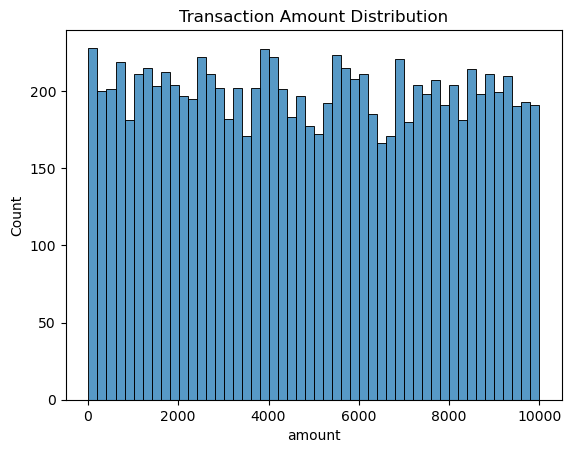

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(gold_fraud_data['amount'], bins=50)
plt.title("Transaction Amount Distribution")
plt.show()

In [82]:
gold_fraud_data['card_type'].value_counts()

card_type
Discover            2633
American Express    2494
Visa                2490
MasterCard          2383
Name: count, dtype: int64

In [83]:
gold_fraud_data['purchase_category'].value_counts()

purchase_category
Travel             1694
Groceries          1692
Gas Station        1666
Retail             1661
Online Shopping    1651
Restaurant         1636
Name: count, dtype: int64

In [85]:
gold_fraud_data['customer_age'].value_counts().sort_index()

customer_age
18-25    1554
26-35    1822
36-50    2857
51-65    2814
66-70     953
Name: count, dtype: int64